<a href="https://colab.research.google.com/github/AbhinavShakunt/MY_Data_Science_Notebooks/blob/main/cnn_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

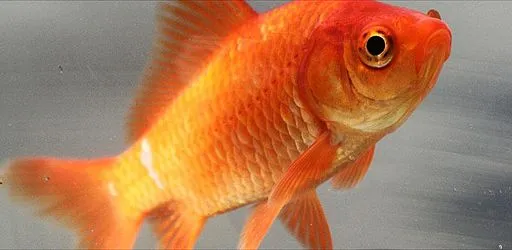

In [3]:
Image.open('/content/drive/MyDrive/goldfish.jpg')

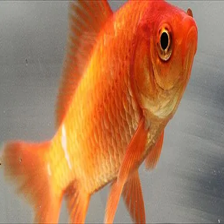

In [4]:
gold_fish = Image.open('/content/drive/MyDrive/goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish

array([[[0.54901961, 0.56078431, 0.54901961],
        [0.55294118, 0.56470588, 0.55294118],
        [0.56470588, 0.57647059, 0.56078431],
        ...,
        [0.59607843, 0.6       , 0.58039216],
        [0.59607843, 0.6       , 0.58039216],
        [0.59607843, 0.6       , 0.58039216]],

       [[0.64705882, 0.65882353, 0.64313725],
        [0.64705882, 0.65882353, 0.64705882],
        [0.65098039, 0.6627451 , 0.65098039],
        ...,
        [0.69019608, 0.69411765, 0.6745098 ],
        [0.69019608, 0.69411765, 0.6745098 ],
        [0.69019608, 0.69411765, 0.6745098 ]],

       [[0.63529412, 0.64313725, 0.63137255],
        [0.63137255, 0.64313725, 0.63137255],
        [0.62745098, 0.63921569, 0.62352941],
        ...,
        [0.66666667, 0.66666667, 0.65098039],
        [0.66666667, 0.66666667, 0.65098039],
        [0.66666667, 0.66666667, 0.65098039]],

       ...,

       [[0.58823529, 0.59215686, 0.56470588],
        [0.59215686, 0.6       , 0.56862745],
        [0.59607843, 0

In [7]:
gold_fish[np.newaxis, ...]

array([[[[0.54901961, 0.56078431, 0.54901961],
         [0.55294118, 0.56470588, 0.55294118],
         [0.56470588, 0.57647059, 0.56078431],
         ...,
         [0.59607843, 0.6       , 0.58039216],
         [0.59607843, 0.6       , 0.58039216],
         [0.59607843, 0.6       , 0.58039216]],

        [[0.64705882, 0.65882353, 0.64313725],
         [0.64705882, 0.65882353, 0.64705882],
         [0.65098039, 0.6627451 , 0.65098039],
         ...,
         [0.69019608, 0.69411765, 0.6745098 ],
         [0.69019608, 0.69411765, 0.6745098 ],
         [0.69019608, 0.69411765, 0.6745098 ]],

        [[0.63529412, 0.64313725, 0.63137255],
         [0.63137255, 0.64313725, 0.63137255],
         [0.62745098, 0.63921569, 0.62352941],
         ...,
         [0.66666667, 0.66666667, 0.65098039],
         [0.66666667, 0.66666667, 0.65098039],
         [0.66666667, 0.66666667, 0.65098039]],

        ...,

        [[0.58823529, 0.59215686, 0.56470588],
         [0.59215686, 0.6       , 0.56862745]

In [8]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 2s 2s/step


(1, 1001)

In [9]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [10]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("/root/.keras/datasets/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

10484/10484 [==============================] - 0s 0us/step


['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [11]:
image_labels[predicted_label_index]

'goldfish'

In [12]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 4s 0us/step


In [13]:
data_dir

'./datasets/flower_photos'

In [14]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [15]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/16241101274_334b54731e.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2330339852_fbbdeb7306_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5674707921_1ffd141bab_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14021281124_89cc388eac_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4552571121_2677bcdec3.jpg')]

In [16]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [17]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/9160289562_ab2718d19b.jpg'),
 PosixPath('datasets/flower_photos/roses/16525204061_9b47be3726_m.jpg'),
 PosixPath('datasets/flower_photos/roses/21347496068_f4d3339607.jpg'),
 PosixPath('datasets/flower_photos/roses/16078501836_3ac067e18a.jpg'),
 PosixPath('datasets/flower_photos/roses/16666836810_216f50e9c3_m.jpg')]

In [18]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [19]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [20]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/9160289562_ab2718d19b.jpg'),
 PosixPath('datasets/flower_photos/roses/16525204061_9b47be3726_m.jpg'),
 PosixPath('datasets/flower_photos/roses/21347496068_f4d3339607.jpg'),
 PosixPath('datasets/flower_photos/roses/16078501836_3ac067e18a.jpg'),
 PosixPath('datasets/flower_photos/roses/16666836810_216f50e9c3_m.jpg')]

In [21]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/9160289562_ab2718d19b.jpg'

In [22]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [23]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [24]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [28]:
X[0].shape

(224, 224, 3)

In [29]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [30]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

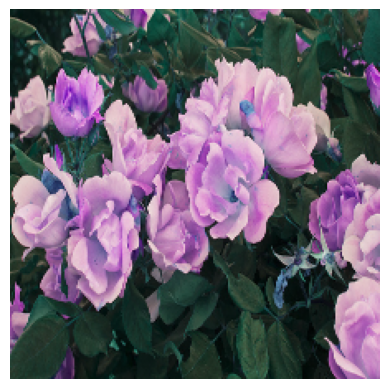

In [31]:
plt.axis('off')
plt.imshow(X[0])

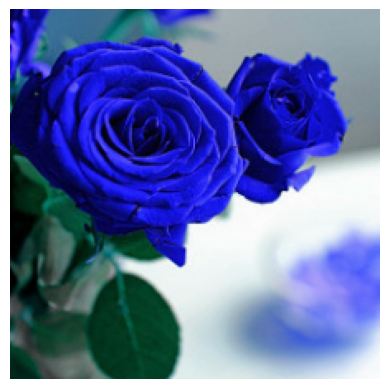

In [32]:
plt.axis('off')
plt.imshow(X[1])

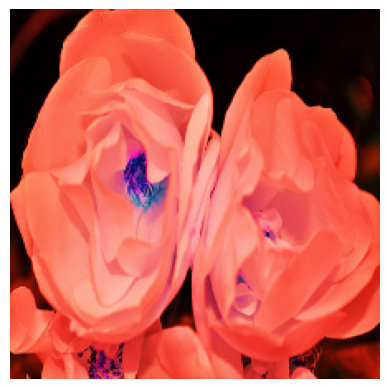

In [45]:
plt.axis('off')
plt.imshow(X[2])

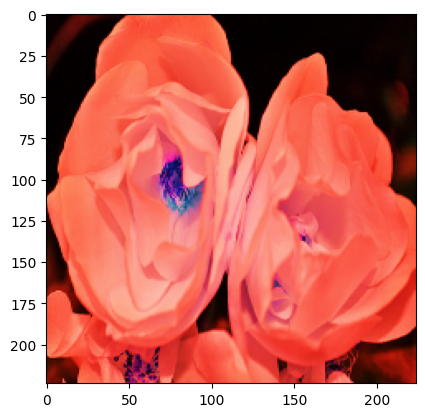

In [34]:
plt.axis('on')
plt.imshow(X[2])

In [35]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([722, 722, 795])

In [36]:
image_labels[795]

'shower curtain'

In [37]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [38]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [40]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 116s 1s/step - loss: 0.4859 - acc: 0.8190
Epoch 2/5
86/86 [==============================] - 113s 1s/step - loss: 0.3378 - acc: 0.8848
Epoch 3/5
86/86 [==============================] - 112s 1s/step - loss: 0.2806 - acc: 0.9077
Epoch 4/5
86/86 [==============================] - 113s 1s/step - loss: 0.2309 - acc: 0.9295
Epoch 5/5
86/86 [==============================] - 113s 1s/step - loss: 0.2003 - acc: 0.9419


In [41]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 41s 1s/step - loss: 0.3614 - acc: 0.8845


[0.3614330291748047, 0.8845316171646118]